In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<진행해야 할 프로세스>

1. 데이터셋 확인 : null data 확인 및 수정.
2. EDA : 여러 feature를 개별적으로 분석, feature들 간의 상관관계 확인. 여러 시각화 툴을 이용해 insight를 얻음.
3. feature engineering : 모델 성능을 높일 수 있도록 feature들을 손봄. 원핫인코딩, 비닝, 텍스트 데이터 처리 등.
4. 모델 만들기 : sklearn을 사용해 모델을 만듦.
5. 모델 학습 및 예측 : trainset을 가지고 모델 학습 후 testset을 가지고 prediction을 함.
6. 모델 평가 : 예측성능이 원하는 수준인지 판단. 풀려는 문제에 따라 모델 평가 방식도 달라짐

<br><hr color=gray><br>

# 1. Dataset 확인

* 파이썬은 테이블화 된 데이터를 다루는 데 최적화됨. (pandas)

In [0]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 우리가 다루는 문제에서 feature는 Pcalss, SibSp, Parch, Fare이며 target label은 Survived임.

 * Survived : 생존여부. 이진변수.
 * Pclass : 티켓의 클래스. 1, 2, 3으로 나뉘는 범주형 변수.
 * Sex : 성별. 이진변수.
 * Age : 나이. 연속형 변수.
 * SibSp : 함께 탑승한 형제와 배우자의 수. 양적변수.
 * Parch : 함께 탑승한 부모, 아이의 수. 양적변수.
 * Ticket : 티켓번호. alphabet + integer.
 * Fare : 탑승료. 연속형 변수.
 * Cabin : 객실 번호. alphabet + integer.
 * Embared : 탑승 항구. C(Cherbourg), Q(Queenstown), S(Southampton).

* describe() 메소드는 각 feature의 통계치를 보여줌.

In [0]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


* PassengerId의 count와 갯수가 다른 feature가 존재함을 확인할 수 있음. 즉 null data가 존재함.
 
<br><hr color=lightgray><br>

## 1.1 Null data check

In [0]:
print("==TrainSet의 feature별 NaN 비율==")
for col in df_train.columns:
    msg = "{:>14} \t {:>5.2f}%".format(col, (df_train[col].isnull().sum() / df_train[col].shape[0]) * 100)
    print(msg)

print("\n==TestSet의 feature별 NaN 비율==")
for col in df_test.columns:
    msg = "{:>14} \t {:>5.2f}%".format(col, (df_test[col].isnull().sum() / df_test[col].shape[0]) * 100)
    print(msg)

==TrainSet의 feature별 NaN 비율==
   PassengerId 	  0.00%
      Survived 	  0.00%
        Pclass 	  0.00%
          Name 	  0.00%
           Sex 	  0.00%
           Age 	 19.87%
         SibSp 	  0.00%
         Parch 	  0.00%
        Ticket 	  0.00%
          Fare 	  0.00%
         Cabin 	 77.10%
      Embarked 	  0.22%

==TestSet의 feature별 NaN 비율==
   PassengerId 	  0.00%
        Pclass 	  0.00%
          Name 	  0.00%
           Sex 	  0.00%
           Age 	 20.57%
         SibSp 	  0.00%
         Parch 	  0.00%
        Ticket 	  0.00%
          Fare 	  0.24%
         Cabin 	 78.23%
      Embarked 	  0.00%


* Train, Test 둘다 Age, Cabin에서 Null data가 존재함을 확인할 수 있음.
* Missingno 라이브러리를 사용하면 Null data의 존재를 더 쉽게 볼 수 있음.

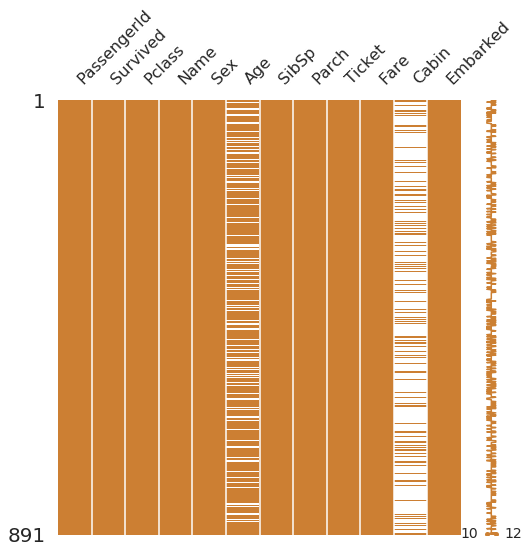

In [0]:
msno.matrix(df=df_train, figsize=(8,8), color=(0.8,0.5,0.2))

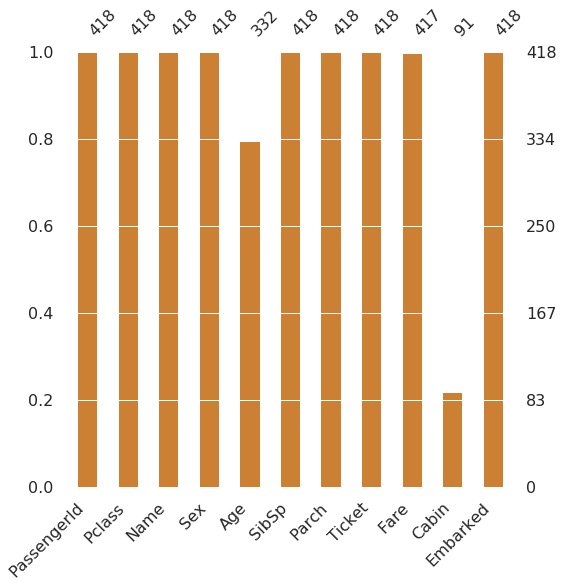

In [0]:
msno.bar(df=df_test, figsize=(8,8), color=(.8,.5,.2))

## 1.2 Target label 확인
* target label이 어떤 distribution을 갖고 있는지 확인해야 함.
* 이진 분류문제에서는 0과 1의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있음.

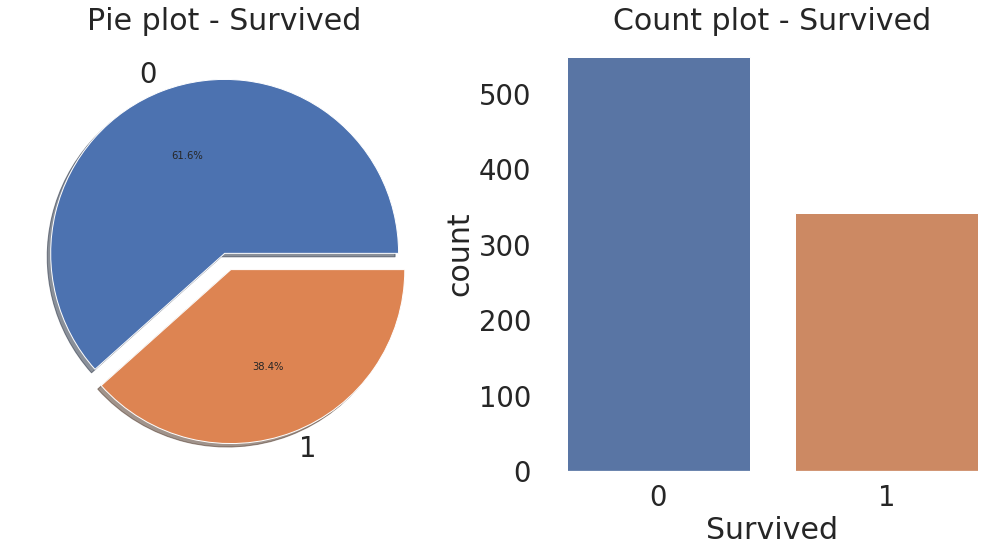

In [0]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

* 38.4%가 생존함.
* target label의 분포가 제법 balanced임. unbalanced일 경우 문제가 생길 수 있음.

<br><hr color=gray><br>

# 2. Exploratory Data Analysis
* 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있음. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 좋음.<br><br>

## 2.1 Pclass
